### 產生稀疏矩陣

In [6]:
import numpy as np
from scipy import sparse

matrix = np.array([[0, 0],
                  [0, 1],
                  [3, 0]])
# 產生壓縮稀數列 只會儲存非0的元素值
matrix_sparse = sparse.csr_matrix(matrix)
print(matrix_sparse)

  (1, 1)	1
  (2, 0)	3


In [9]:
matrix.shape # (列, 行)
matrix.size  # (列*行)
matrix.ndim  #　維度

2

### 函式向量化

In [14]:
add_100 = lambda i :i+100
vectorized_add_100 = np.vectorize(add_100)
vectorized_add_100(matrix)
# 或是
matrix+100

array([[100, 100],
       [100, 101],
       [103, 100]])

### 陣列比大小

In [23]:
np.max(matrix)
# 每行列比較
np.max(matrix, axis=0)
np.max(matrix, axis=1)
np.min(matrix)
np.mean(matrix)
np.var(matrix)
np.std(matrix)

1.1055415967851334

### Reshape

In [25]:
# size要相等才能相互reshape
matrix = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9],
                  [10, 11, 12]])
matrix = matrix.reshape(2, 6)
matrix

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

### transpose

In [26]:
matrix.T

array([[ 1,  7],
       [ 2,  8],
       [ 3,  9],
       [ 4, 10],
       [ 5, 11],
       [ 6, 12]])

In [27]:
np.array([1, 2, 3, 4, 5, 6]).T

array([1, 2, 3, 4, 5, 6])

In [28]:
np.array([[[1, 2, 3, 4, 5, 6]]]).T

array([[[1]],

       [[2]],

       [[3]],

       [[4]],

       [[5]],

       [[6]]])

### Flatten

In [31]:
matrix.flatten()
matrix.reshape(1, -1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

### 找出矩陣的秩

In [33]:
matrix = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
np.linalg.matrix_rank(matrix)

2

### 行列式計算

In [35]:
matrix = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 8, 9]])
np.linalg.det(matrix)

0.0

### 取得對角線

In [43]:
matrix = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 8, 9]])
matrix.diagonal()

array([1, 4, 9])

In [44]:
matrix.diagonal(offset=1) # 對角線上

array([2, 6])

In [46]:
matrix.diagonal(offset=-1) #對角線下

array([2, 8])

### Trace

In [49]:
matrix.trace() # 對角線和
sum(matrix.diagonal())

14

### 特徵值與特徵向量計算

In [50]:
matrix = np.array([[1, -1, 3],
                  [1, 1, 6],
                  [3, 8, 9]])
eigenvalues, eigenvectors = np.linalg.eig(matrix)

In [56]:
print(eigenvalues)
print()
print(eigenvectors)

[13.55075847  0.74003145 -3.29078992]

[[-0.17622017 -0.96677403 -0.53373322]
 [-0.435951    0.2053623  -0.64324848]
 [-0.88254925  0.15223105  0.54896288]]


### 點積, 加減法

In [ ]:
np.dot(v_a, v_b) # v_a @ v_b
# v_a * v_b 元素逐一相乘
np.add(v_a, v_b) # v_a + v_b
np.substract(v_a, v_b) # v_a - v_b

### 反矩陣

In [61]:
matrix = np.array([[1, 4], [2, 5]])

In [63]:
np.linalg.inv(matrix)

array([[-1.66666667,  1.33333333],
       [ 0.66666667, -0.33333333]])

In [65]:
matrix @ np.linalg.inv(matrix)

array([[1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00]])

### 亂數陣列

In [66]:
np.random.seed(0)
np.random.random(3)
np.random.ranint(0, 11, 3) # range(0,11) 取三個
np.random.normal(0.0, 1.0, 3) # 常態分配 平均數0 標準差1 取三個
np.random.logistic(0.0, 1.0, 3) # 邏輯分布 平均為0.0, 尺度為1.0 取三個
np.random.uniform(1.0, 2.0, 3) # 1.0<=X<2.0 取三個

array([0.5488135 , 0.71518937, 0.60276338])

# Chapter 2

### 模擬資料集的產生(回歸/分類)

In [76]:
from sklearn.datasets import make_regression, make_classification
make_regression(n_samples=100,n_features=3, n_informative=3, n_targets=1, noise=0.0, coef=True, random_state=1)
make_classification(n_samples=100, n_features=3, n_informative=3, n_redundant=0, n_classes=2, weights = [.25, .75], random_state=1)
# n_informative 決定了用來產生目標向量的特徵數
# 若n_information數量小於特徵的全部數量(n_features)所產生的資料集就會有多餘的特徵
# weight用作模擬帶有不平衡類別的資料集

(array([[ 1.06354768e+00, -1.42632219e+00,  1.02163151e+00],
        [ 2.31569771e-01,  1.49535261e+00,  3.32515785e-01],
        [ 1.59729509e-01,  8.35335154e-01, -4.08695544e-01],
        [-7.06121328e-01, -1.03281003e+00,  1.39477986e+00],
        [ 8.44490198e-01, -6.19971892e-01,  1.08791124e+00],
        [ 5.59394552e-01, -1.45815378e+00,  1.47602390e+00],
        [-2.34279989e+00, -8.62141541e-01, -7.02236503e-01],
        [-5.02301432e-01, -1.11266501e+00,  9.94591165e-01],
        [ 9.18051403e-01, -1.31813097e+00,  1.37672287e+00],
        [-6.37174666e-01,  5.90888879e-01, -2.20412713e-01],
        [ 1.27505434e+00,  1.81333214e+00, -1.76262615e-01],
        [-8.44318348e-02, -8.41896666e-01,  1.27619816e+00],
        [ 1.17033878e+00, -2.50462535e-01,  6.51088535e-02],
        [ 1.86526206e+00, -1.44673919e+00,  5.82315275e-01],
        [-4.51512990e-01, -1.00104693e+00,  1.42523865e+00],
        [-1.52227032e+00, -9.58868332e-01,  9.82710762e-01],
        [-7.51474297e-01

### 模擬資料集的產生(分群)

In [82]:
from sklearn.datasets import make_blobs
features, target = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=1)

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

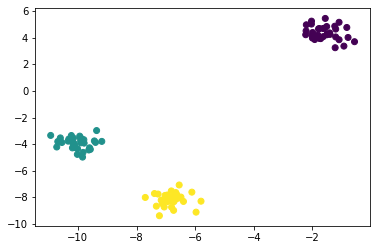

In [86]:
import matplotlib.pyplot as plt
plt.scatter(features[:,0], features[:,1], c=target)

### CSV Loads

In [ ]:
df = pd.read_csv(url)

### Excel Loads

In [ ]:
df = pd.read_excel(url, sheetname=0, header=1)

### Json Loads

In [ ]:
pd.read_json(url, orient='column') # json_normalize

### SQL Loads

In [ ]:
from sqlalchemy import create_engine
db = create_engine('sqlite:///sample.db')
df = pd.read_sql_query('SELECT * FROM data', db)